Metodo de evaluación de modelo

In [14]:
import pandas as pd
import numpy as np
import os
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination
from sklearn.model_selection import train_test_split




df = pd.read_csv('heart_disease_modified.csv')

df.isna().sum()
train_data = df.iloc[:212]
test_data =df.iloc[212:]


model_ent = BayesianModel([('age','chol'),('age','fbs'),('sex','chol'),('sex','fbs')
                      ,('chol','num'),('fbs','num')
                      , ('num','cp'), ('num','exang'), ('num','anom_thalach'), ('num','trestbps')])

model_ent.fit(train_data, estimator=MaximumLikelihoodEstimator)


from pgmpy.inference import VariableElimination
from sklearn.metrics import confusion_matrix

# Crear el objeto VariableElimination para ambos modelos


y_pred_test = []
infer_train = VariableElimination(model_ent)


for i in range(len(test_data)):
    queryt = infer_train.query(variables=['num'], evidence={'age': test_data.iloc[i,0], 'sex': test_data.iloc[i,1],'cp': test_data.iloc[i,2],'trestbps': test_data.iloc[i,3],'chol': test_data.iloc[i,4],'fbs': test_data.iloc[i,5],'anom_thalach': test_data.iloc[i,9]})   
    P1t = queryt.values
    
    
    if P1t[1]>=0.5:

        y_pred_test.append(1)
    else:
        y_pred_test.append(0)  # 1 es el índice de la etiqueta positiva

print(y_pred_test)


Colaboradores
1 -> Sofi , 2 -> Juanjo, 3 -> Sebas


C:\Users\JUAN JOSE F ROMERO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
C:\Users\JUAN JOSE F ROMERO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
C:\Users\JUAN JOSE F ROMERO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:478: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()


[0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0]


In [16]:
df = pd.read_csv('heart_disease_modified.csv')


print(train_data)




        age  sex   cp trestbps     chol  fbs  thalach  exang  num  \
0    55-100  1.0  1.0  140-300    0-240  1.0    150.0    0.0  0.0   
1    55-100  1.0  4.0  140-300  260-400  0.0    108.0    1.0  1.0   
2    55-100  1.0  4.0    0-120    0-240  0.0    129.0    1.0  1.0   
3      0-45  1.0  3.0  120-140  240-260  0.0    187.0    0.0  0.0   
4      0-45  0.0  2.0  120-140    0-240  0.0    172.0    0.0  0.0   
..      ...  ...  ...      ...      ...  ...      ...    ...  ...   
207   45-55  1.0  4.0  140-300    0-240  0.0    126.0    1.0  1.0   
208   45-55  1.0  2.0  120-140  260-400  0.0    155.0    0.0  0.0   
209  55-100  0.0  4.0  140-300  240-260  0.0    154.0    1.0  1.0   
210    0-45  0.0  3.0    0-120    0-240  0.0    170.0    0.0  0.0   
211    0-45  1.0  1.0    0-120    0-240  0.0    182.0    1.0  1.0   

     anom_thalach  
0               0  
1               0  
2               0  
3               1  
4               0  
..            ...  
207             0  
208        

Matriz de confusión


Matriz de confusión del modelo de prueba:
[[36 12]
 [12 31]]
Indicadores Generales
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        48
         1.0       0.72      0.72      0.72        43

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



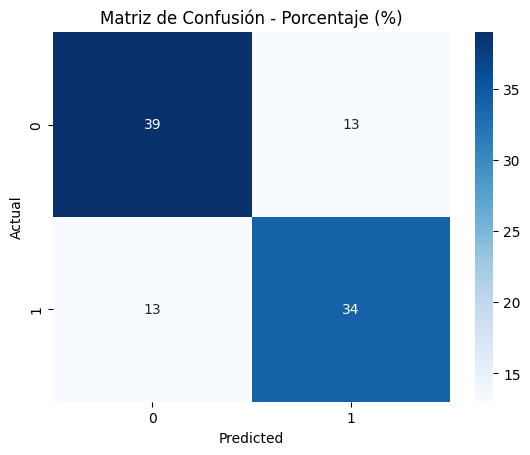

In [17]:
from sklearn.metrics import classification_report


cm = confusion_matrix(test_data["num"], y_pred_test)



print("Matriz de confusión del modelo de prueba:")
print(cm)

print("Indicadores Generales")
report = classification_report(test_data["num"], y_pred_test)
print(report)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm_test = cm
sumat = 0
for i in cm :
    sumat += sum(i)

for i in range(len(cm_test)):
    for j in range(len(cm_test[1])):
        cm_test[i,j]=(cm[i,j]/sumat*100)

# Crear el mapa de calor utilizando Seaborn
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='')


# Personalizar la figura
plt.title('Matriz de Confusión - Porcentaje (%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




Calculo indicadores estadísticos modelo

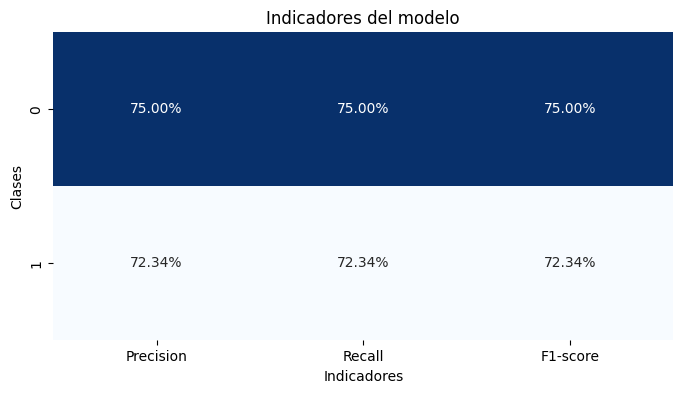

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score



# Calcular los valores de precisión, recall y f1-score
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1 = 2 * precision * recall / (precision + recall)

# Crear un dataframe con los valores de los indicadores
df_indicadores = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1-score': f1})

# Crear la figura y el mapa de calor
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(df_indicadores, annot=True, cmap='Blues', cbar=False, fmt='.2%')

# Añadir títulos y etiquetas
ax.set_title('Indicadores del modelo')
ax.set_xlabel('Indicadores')
ax.set_ylabel('Clases')

# Mostrar la figura
plt.show()


Nueva estructura modelo - Hill Climb Search

In [19]:
import pandas as pd
from pgmpy . estimators import HillClimbSearch
from pgmpy . estimators import K2Score
from pgmpy . estimators import BicScore
scoring_method = BicScore ( data =train_data)
esth = HillClimbSearch ( data =train_data)
m2 = esth . estimate (
    scoring_method = scoring_method , max_indegree =4 , max_iter =int (1000)
)
print ( m2 )
print ( m2 . nodes () )
print ( m2 . edges () )


modelo2 = BayesianNetwork(m2)
modelo2.fit(data=train_data, estimator=MaximumLikelihoodEstimator)
for i in modelo2 . nodes () :
    print( modelo2 . get_cpds (i))



from pgmpy.inference import VariableElimination
from sklearn.metrics import confusion_matrix

# Crear el objeto VariableElimination para ambos modelos


y_pred_test2 = []
infer_train = VariableElimination(modelo2)

for i in range(len(test_data)):
    query2 = infer_train.query(variables=['num'], evidence={'age': test_data.iloc[i,0], 'sex': test_data.iloc[i,1],'cp': test_data.iloc[i,2],'trestbps': test_data.iloc[i,3],'chol': test_data.iloc[i,4],'fbs': test_data.iloc[i,5],'anom_thalach': test_data.iloc[i,9]})   
    P1t2 = query2.values
    
    
    if P1t2[1]>=0.5:

        y_pred_test2.append(1)
    else:
        y_pred_test2.append(0)  # 1 es el índice de la etiqueta positiva

print(y_pred_test2)


  1%|          | 6/1000 [00:00<01:33, 10.60it/s]


DAG with 10 nodes and 6 edges
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'num', 'anom_thalach']
[('age', 'trestbps'), ('cp', 'num'), ('exang', 'anom_thalach'), ('num', 'exang'), ('num', 'age'), ('num', 'sex')]
+-------------+---------------------+----------+
| num         | num(0.0)            | num(1.0) |
+-------------+---------------------+----------+
| age(0-45)   | 0.2672413793103448  | 0.125    |
+-------------+---------------------+----------+
| age(45-55)  | 0.3793103448275862  | 0.21875  |
+-------------+---------------------+----------+
| age(55-100) | 0.35344827586206895 | 0.65625  |
+-------------+---------------------+----------+
+----------+---------------------+---------------------+
| num      | num(0.0)            | num(1.0)            |
+----------+---------------------+---------------------+
| sex(0.0) | 0.39655172413793105 | 0.16666666666666666 |
+----------+---------------------+---------------------+
| sex(1.0) | 0.603448275862069   | 0.83

Matriz de confusión del modelo de prueba:
[[38 10]
 [12 31]]
Indicadores Generales
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78        48
         1.0       0.76      0.72      0.74        43

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



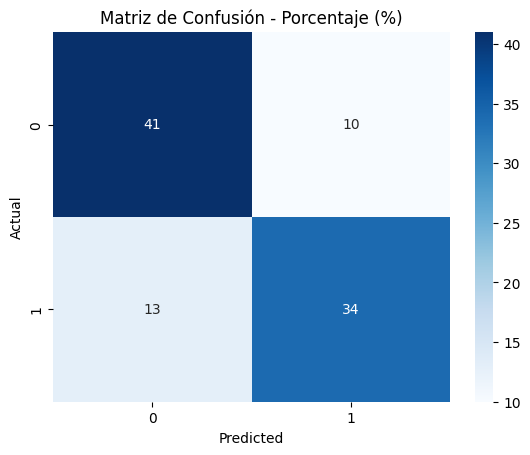

In [20]:
from sklearn.metrics import classification_report


cm2 = confusion_matrix(test_data["num"], y_pred_test2)



print("Matriz de confusión del modelo de prueba:")
print(cm2)

print("Indicadores Generales")
report2 = classification_report(test_data["num"], y_pred_test2)
print(report2)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm_test2 = cm2
sumat2 = 0
for i in cm2 :
    sumat2 += sum(i)

for i in range(len(cm_test2)):
    for j in range(len(cm_test2[1])):
        cm_test2[i,j]=(cm2[i,j]/sumat2*100)

# Crear el mapa de calor utilizando Seaborn
sns.heatmap(cm_test2, annot=True, cmap='Blues', fmt='')


# Personalizar la figura
plt.title('Matriz de Confusión - Porcentaje (%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

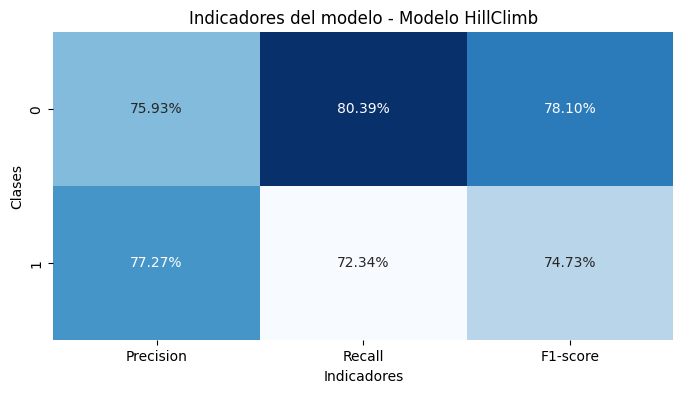

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score



# Calcular los valores de precisión, recall y f1-score
precision2 = np.diag(cm2) / np.sum(cm2, axis=0)
recall2 = np.diag(cm2) / np.sum(cm2, axis=1)
f1_2 = 2 * precision2 * recall2 / (precision2 + recall2)

# Crear un dataframe con los valores de los indicadores
df_indicadores2 = pd.DataFrame({'Precision': precision2, 'Recall': recall2, 'F1-score': f1_2})

# Crear la figura y el mapa de calor
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(df_indicadores2, annot=True, cmap='Blues', cbar=False, fmt='.2%')

# Añadir títulos y etiquetas
ax.set_title('Indicadores del modelo - Modelo HillClimb')
ax.set_xlabel('Indicadores')
ax.set_ylabel('Clases')

# Mostrar la figura
plt.show()

In [8]:
test_data

,age,sex,cp,trestbps,chol,fbs,thalach,exang,num,anom_thalach
285,55-100,1.0,4.0,0-120,260-400,0.0,140.0,0.0,1.0,0
269,0-45,1.0,3.0,120-140,0-240,0.0,150.0,0.0,0.0,0
167,45-55,0.0,2.0,120-140,260-400,1.0,159.0,1.0,0.0,0
9,45-55,1.0,4.0,120-140,0-240,1.0,155.0,1.0,1.0,0
78,45-55,1.0,2.0,120-140,240-260,0.0,180.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
134,0-45,0.0,3.0,120-140,0-240,0.0,165.0,0.0,0.0,0
73,55-100,1.0,4.0,0-120,240-260,0.0,158.0,0.0,1.0,1
15,55-100,1.0,3.0,140-300,0-240,0.0,174.0,0.0,0.0,1
10,55-100,1.0,4.0,120-140,0-240,0.0,148.0,0.0,0.0,0
